# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

  With the advent of social media, buying music has almost become a thing of the past. Media platforms such as Spotify, YouTube and Pandora have revolutionized the industry, breaking away from traditional, sales based revenue to one of ad based revenue. Ads allow major companies to tailor specific products that may generate the sales that buying music no longer provide. To do so, companies must be able to grab a potential customer's attention and hold it in a way that allows for maximum interaction and minimum dissatisfaction.  

  In this way, music recommendation systems can provide savvy companies with a variety of different revenue streams; increasing revenue from the selling of ad space, paying less for individual artists or songs, capitalizing on the shared spaces of different social media and enhancing customer experience and satisfaction.

  Recommendation systems can often require a specific amount of customer information which can lead to a distinct pattern of consumer withdrawal, even when all other consumer interests are met. Newly implemented data privacy laws have given consumers far more power over what personal information is shared with 1st, 2nd and 3rd party entities. In this environment, recommendation systems featuring content and popularity hybrid validations may provide the most robust solutions available to entice consumers irrespective of any privacy concerns.

  The reluctance of many consumers to rate or comment on items makes it imperative for companies to find unique and accurate ways to satisfy unrecognized customer needs. Platforms relying on customer provided information must have other means of linking customers with their needs and desires. Building prediction models with a focus on precision and accuracy will provide robust recommendation systems tailor fitted to possible customers.

  Finally, with such a large selection of items available at will to the majority of consumers, information overload can lead to disatisfaction and a reluctance to interact. Recommendation systems are needed to find out what matters most to possible customers who are daunted by the possibilities. The heterogenity in the data requires robust, reliable, accurate and precise prediction models that satisfy the user, the provider and the recommendation system.

### **The objective:**

  The objective of this problem is to build a robust, reliable recommendations system that allows for enhanced user experience by tailoring music for each specific user. This system should allow maximum product interaction as well as build an ever increasing base of loyal, consuming customers. It should provide accurate predictions for reluctant users, an ability to understand a user's preferences even with significant unknown concerns (such as privacy), with as little outside interferance as possible.


### **The key questions:**

- Some key questions that are asked:
-  How accurately can the model predict user interaction with preferred songs?
-  How precisely can the model match users with new songs that will increase interaction?
-  How reliable is the model in matching different, unique users with not only preferred songs, but with new songs, artists and genres?
- Can the model understand a user's preference under limited known values and limited customer interaction?

### **The problem formulation**:

-  Using data science, the recommendations system built here should satisfy all requirements to provide the ultimate customer experience, using advanced prediction methods and techniques to accurately match users with songs, introduce new music, and to increase customer retention through instant and reliable satisfaction. The model will solve the problem of matching users with products in the fewest clicks possible, at any given time or context, providing the essential ingredient for accurate connections.

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [3]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
!pip install scikit-learn
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error


### **Load the dataset**

In [4]:
# Importing the datasets
song_df = pd.read_csv("/content/sample_data/song_data.csv")
count_df = pd.read_csv("/content/sample_data/count_data.csv")

### **Understanding the data by viewing a few observations**

In [5]:
# See top 10 records of count_df data
count_df.groupby(['play_count', 'song_id']).play_count.value_counts().nlargest(10)

play_count  song_id             play_count
1           SOFRQTD12A81C233C0  1             3373
            SOAXGDH12A8C13F8A1  1             2926
            SOAUWYT12A81C206F1  1             2577
            SONYKOW12AB01849C9  1             2533
            SOSXLTC12AF72A7F54  1             2427
            SOLFXKT12AB017E3E0  1             2309
            SOFLJQZ12A6D4FADA6  1             2256
            SOEGIYH12A6D4FC0E3  1             2232
            SOBONKR12A58A7A7E0  1             2175
            SODJWHY12A8C142CCE  1             2153
Name: play_count, dtype: int64

In [6]:
# See top 10 records of song_df data
song_df.groupby('song_id').title.value_counts().nlargest(10)

song_id             title                
SOBPAEP12A58A77F49  Kyoto Song               3
SOBPICV12A8151CDF1  This Fire                3
SODIYLM12AB017F8BB  I Do Not Hook Up         3
SODOLVO12B0B80B2F4  Hell                     3
SOEGQML12AF7299C84  California Callin'       3
SOEHQBQ12A6D4F9EA9  Before Three             3
SOESVAM12A8C138BF2  Words So Leisured        3
SOFBCSG12AAF3B2AA0  The Nature Of Reality    3
SOFDFMX12A5891F74F  Josie                    3
SOFQIZF12A67ADE730  L. Wells                 3
Name: title, dtype: int64

In [7]:
song_df.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


### **Let us check the data types and and missing values of each column**

In [8]:
# See the info of the count_df data
count_df

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
...,...,...,...,...
1999995,1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2
1999996,1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4
1999997,1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3
1999998,1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1


In [9]:
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [10]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:**

-There are 2 million rows and 4 columns in the count_df dataset. There are 1 million rows and 5 columns in the song_df dataset. A large data set such as this provides thousands of possible interactions between users and items.

-Both datasets have only objects and integers.

-The release and title columns have missing values.

-The unnamed column from the Count set will need to be dropped.


In [11]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")

# Drop the column 'Unnamed: 0'
df.drop(df.index[df['Unnamed: 0'] == 0], inplace = True)
df= df.drop(['Unnamed: 0'], axis = 1)


In [12]:
df

,user_id,song_id,play_count,title,release,artist_name,year
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [13]:
# Apply label encoding for "user_id" and "song_id"
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit transform the user_id column
df['user_id'] = le.fit_transform(df['user_id'])

# Fit transform the song_id column
df['song_id'] = le.fit_transform(df['song_id'])

df.head()

,user_id,song_id,play_count,title,release,artist_name,year
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
5,54961,1239,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

-  Yes, it is a very wise decision to filter the data to include users who have listened to a good count of songs. As the data is so sparse, filtering it would provide more accurate predictions based on popularity and song interaction. This can also reduce any bias introduced because of the sparcity of the data and the limited interaction of most songs in the database.

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [14]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [15]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [16]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [17]:
# We want our song to be listened by atleast 120 users to be considred
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [18]:
# Drop records with play_count more than(>) 5
df_final=df_final[df_final.play_count<=5]

In [19]:
# Check the shape of the data
df_final.shape

(117876, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [20]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3155

Total number of unique song id

In [21]:
# Display total number of unique song_id
df_final['song_id'].nunique()

563

Total number of unique artists

In [22]:
# Display total number of unique artists
df_final['artist_name'].nunique()

232

In [23]:
df_final.nunique()

user_id        3155
song_id         563
play_count        5
title           561
release         369
artist_name     232
year             37
dtype: int64

#### **Observations and Insights:**

-There are 3154 total users.

-There are 563 unique songs.

-There are 232 unique artists.

- With this amount of data, the possibilites of connecting new users with new songs or new artists is only bound by customer interaction.

- Despite the numbers, the datasets are actually very sparse, meaning there are hundreds of thousands of more interactions that are available. This is one of the problems that a reliable recommendations system could solve. We will need to learn a bit more about the data to move forward, however we know that sophsiticated methods will be needed. It is imperative to start with simple solutions and grow from there as more information is provided.


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [25]:
df_final['song_id'].value_counts()

8582    751
352     748
2220    713
1118    662
4152    652
       ... 
9048    103
6450    102
990     101
4831     97
8324     96
Name: song_id, Length: 563, dtype: int64

Most interacted users

In [26]:
df_final['user_id'].value_counts()

61472    243
15733    227
37049    202
9570     184
23337    177
        ... 
19776      1
45476      1
17961      1
14439      1
10412      1
Name: user_id, Length: 3155, dtype: int64

#### **Observations and Insights:**

- The most popular song is song_id 8582, with over 720 interactions between users. The top five most interacted songs however, are on a small spread, with around 100 interactions separating them. In contrast, the least interacted song has only a small audience of 45 users. Far more interaction between the lowest rated songs and users who've not rated songs is needed.

- User 61472 is the busiest user, but this user's numbers are astronomically low in relation to the amount of songs available. There's seems to be a steep bias towards users who have not interacted with more than a few songs. A reliable recommendations system could be used to match the least active users with the least active songs, increasing visibility of those songs and introducing users to new music that can provide baseline recommendations for other, similar users.

-  With these predictions, the likelhood of matching users with songs or artists they will interact with, and thus spend more time on the platorm, grows exponentially.


Songs played in a year

In [27]:
# number of songs played in a year
# groupby function on the 'year' column
songs_played = df_final.groupby('year').count()['title']
songs_played.head()

year
0       20649
1969      238
1970      109
1971      133
1973      270
Name: title, dtype: int64

In [28]:
dropped = pd.DataFrame(songs_played)
dropped.drop(dropped.index[0], inplace = True)
dropped.head()

,title
year,
1969,238
1970,109
1971,133
1973,270
1974,583


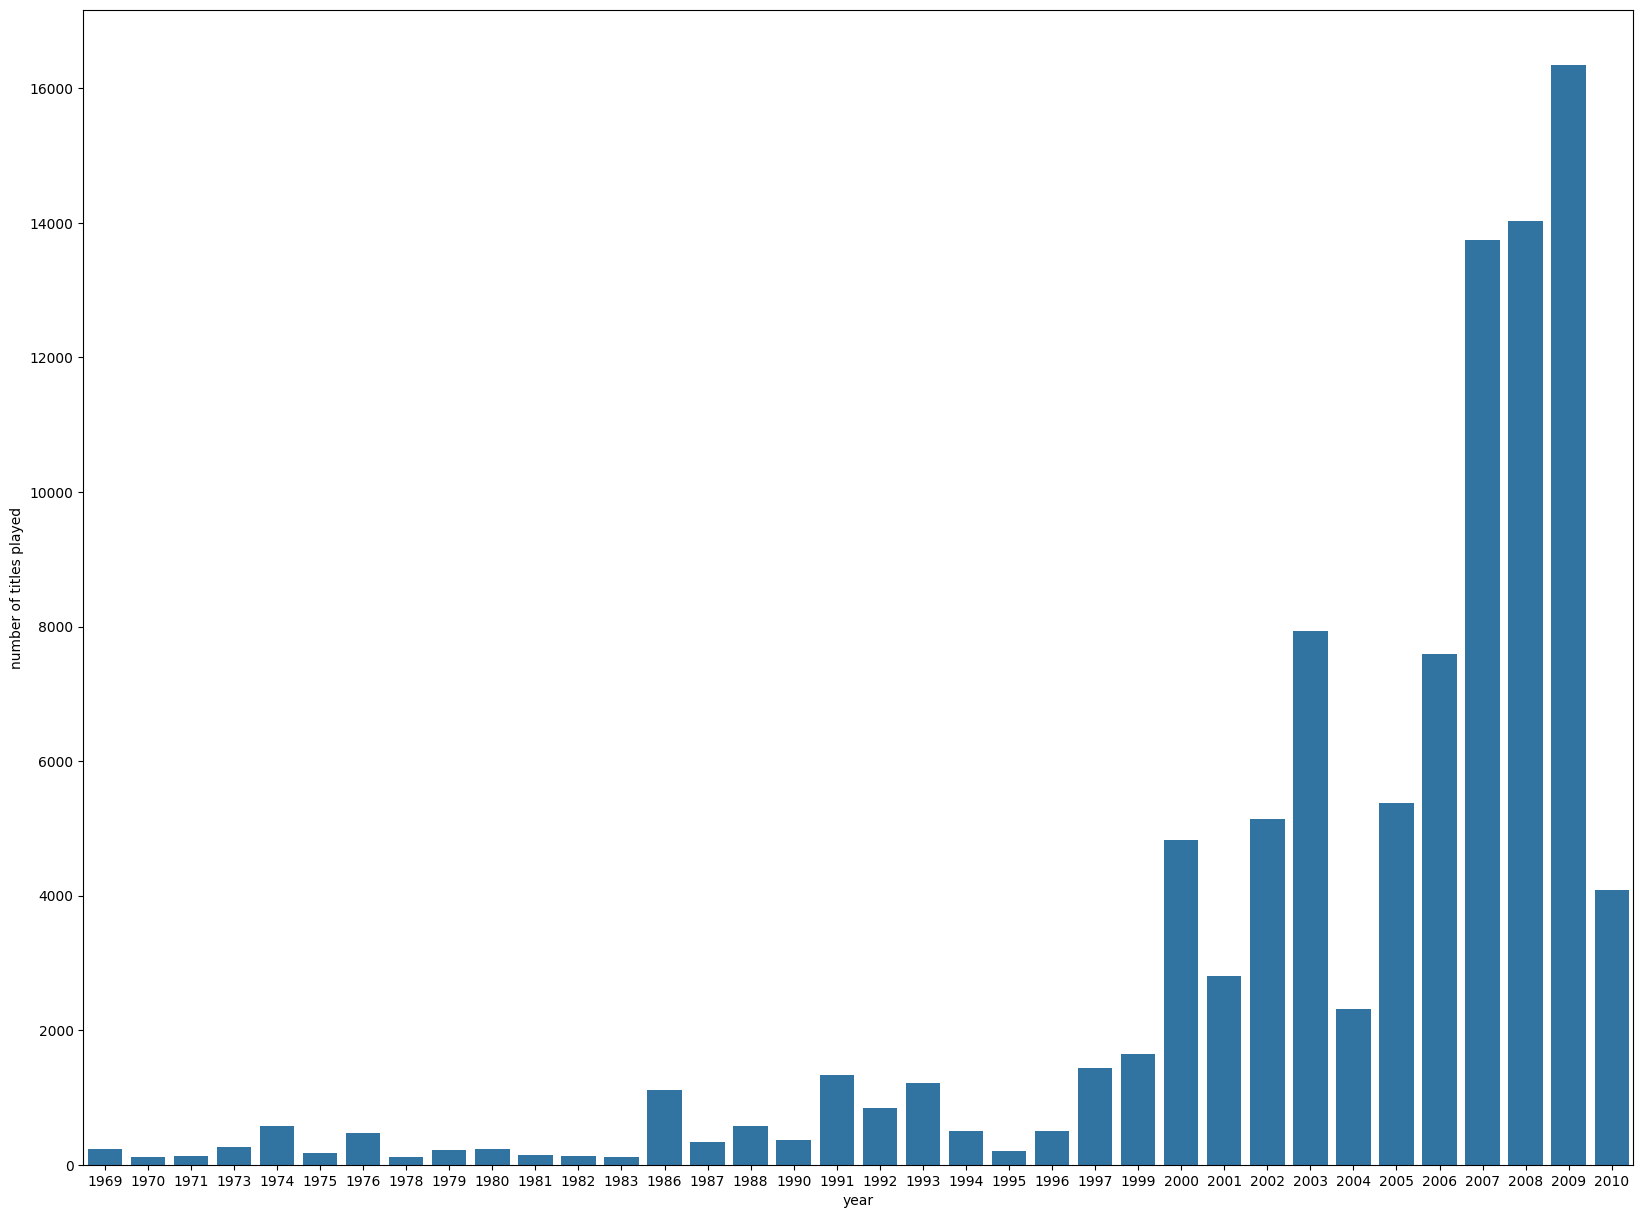

In [29]:
# Create a barplot plot with y label as "number of titles played" and x -axis year

# Set the figure size
plt.figure(figsize = (20, 15))
sns.barplot(x = dropped.index, y = 'title', data = dropped, estimator = np.median)

# Set the x label of the plot
plt.xlabel('year')

# Set the y label of the plot
plt.ylabel('number of titles played')

# Show the plot
plt.show()

#### **Observations and Insights:**

-This visual representation of the number of songs played in a year suggests that as time progressed, music production increased. This also suggests that music quality increased in relation to demand, but more research is needed. This is a steady trend, with exponential growth seen in the 2000s. However, there seems to be an extenuating circumstance in 2009 that halted production and demand for the next year.


**Think About It:** What other insights can be drawn using exploratory data analysis?

-  We see that the glut of interaction with older music leaves several avenues of exploration for predictions and recommendations.

-  Finding users who will interact with these older songs will provide valuable and much needed insight to find other similar *users* without further customer concerns, such as sharing private information.

-  Furthering exposure to less popular songs can lead to increased revenue through further ad interaction.

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [30]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column
average_count = df_final.groupby('song_id')['play_count'].mean()
# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
play_freq = df_final.groupby('song_id')['play_count'].count()

In [31]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'average_count': average_count, 'play_freq': play_freq})

# Let us see the first five records of the final_play dataset
final_play

,average_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115
...,...,...
9939,1.683983,231
9942,2.486667,150
9960,1.597122,139


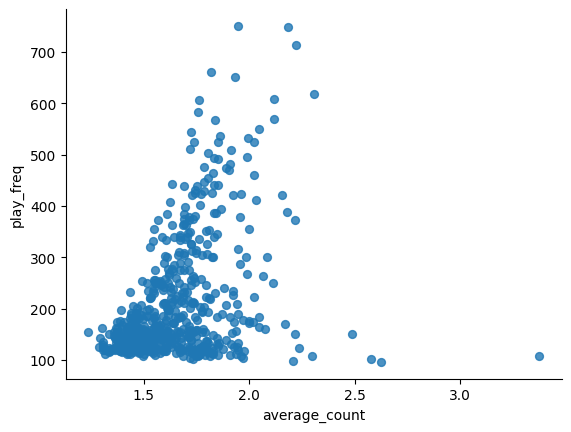

In [32]:
# @title average_count vs play_freq

from matplotlib import pyplot as plt
final_play.plot(kind='scatter', x='average_count', y='play_freq', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [33]:
# Build the function to find top n songs
def top_n_songs(data, n, min_interaction = 100):

    recommendations = data[data['play_freq'] > min_interaction]

    recommendations = recommendations.sort_values(by = 'average_count', ascending = False)

    return recommendations.index[:n]


In [34]:
# Recommend top 10 songs using the function defined above
list(top_n_songs(final_play, 10, 100))

[7224, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614, 352]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [36]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

In [37]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

-  Because of the size of the dataset and the unknowns created by less popular songs and reluctant users, combining recall and precision into a single metric is very useful and valuable to compute performance.

In [38]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

-  Precision is increased when the threshold value increases, while recall is optimized when the threshold value decreases. Perhaps a function that uses the ground truth results and finds the optimal threshold value is needed.

- The *F_1 score* optimizes precision and recall by combining both metrics into a single value, providing a thorough and comprehensive evaluation of multiple models. Tuning this value can increase performance, especially with heavily skewed data. It is also simple and very effective.

In [39]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale = (0, 5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.4, random_state = 42)

**Think About It:** How changing the test size would change the results and outputs?

In [40]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine', 'user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user)

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:**

-RMSE is ~1.09, which could defintely be improved, as we need this number lower for more reliable predictions.

-Precision is 0.40 meaning, of all recommended songs, only 40% are relevant. Another low number that must be improved. Fine tuning the model is needed.

-Recall is 0.70, meaning of of all relevant songs, only 70% are recommended, leaving a large number of songs unrated or unrecognized.

-F_1 score of the default model is 0.504 indicating that there is much room for improvement, as ~50% of recommended songs are irrelevant. We can try to improve this using GridSearchCV by tuning different hyperparameters of this algorithm.

In [42]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
sim_user_user.predict(1500, 609, r_ui = 3, verbose = True)

user: 1500       item: 609        r_ui = 3.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=1500, iid=609, r_ui=3, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [43]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user
sim_user_user.predict(1500, 2001, verbose = True)

user: 1500       item: 2001       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=1500, iid=2001, r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:**

- We will user r_ui values to compare predicted and actual values.

- We see that the actual play_count of the user - item pair is 2 and predicted play_count is 1.70 by the user - user similarity - based default model. needs further improving before training.

- The model is also under estimating the play_count, meaning more tuning of the parameters are needed.

"Actual_k" is the value of neighbors that the KNN model uses while training the model.

Fine tuning parameters should produce more reliable results.

In [44]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9], 'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"], 'user_based': [True], "min_support": [2, 4]}}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.045400077725328
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [45]:
# Train the best model found in above gridsearch
sim_options = {'name': 'pearson_baseline', 'user_based': True}
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)
sim_user_user_optimized.fit(trainset)
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


**Observations and Insights:**

- The F_1 score of the tuned model has increased slightly in comparison to the baseline model.

- Even though RMSE of the model has gone down relative to the model before hyperparameter tuning, there is still room for improvement.

In [46]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [47]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 3232, r_ui = None, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4516261428486725, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:**

-The estimated play_count for user_id 6958 improved using the tuned model as compared to the default model from 1.80 to 1.96. This is a great improvement.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [48]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, 5)

[42, 1131, 17, 186, 249]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [49]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those business ids which the user_id has not visited yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    # Looping through each of the business ids which user_id has not interacted yet
    for item_id in non_interacted_songs:

        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n]# Returing top n highest predicted rating products for this user

In [50]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user)

In [51]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,3.141147
1,614,2.525000
2,5653,2.514023
3,352,2.425000
4,6450,2.394927


**Observations and Insights:**

> Indented block



This recommendation system will give us the top 5 recommended songs for similarity based users.

### Correcting the play_counts and Ranking the above songs

In [52]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts

  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [53]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,352,748,2.425000,2.388436
1,614,373,2.525000,2.473222
2,5653,108,2.514023,2.417798
3,7224,107,3.141147,3.044473
4,6450,102,2.394927,2.295913


**Observations and Insights:**

- In the above-corrected rating formula, we could add the quantity 1 / np.sqrt(n) instead of subtracting it to get more optimistic predictions. As there are some songs with play_count over 5, we cannot use these values.

- Comparing the play_count and user_count of two songs should give better quality recommendations.

- Calculating the "corrected_ratings" for each song should give a more clear and concise estimate of the accuracy of predictions. Higher play count usually correlates with higher popularity. This is only effective however, with more data.

### Item Item Similarity-based collaborative filtering recommendation systems

In [54]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
sim_options = {'name': 'cosine','user_based': False}
sim_item_item = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1) # Using random_state = 1
sim_item_item.fit(trainset)
precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**

The baseline model is giving an F_1 score of 0.397, far lower than what is required for an effective, accurate recommendations model. This is lower in comparison to the user user similarity-based collaborative filtering (F_1 score = 0.504). GridSearchCV optimization may yield better results.

In [55]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [56]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_user_user_optimized.predict(6958, 3232, r_ui = None, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4516261428486725, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:**

User_id 6958's play count is lower compared to the user user similarity-based collaborative filtering recommendation system, meaning this model is not performing as well as expected.

In [57]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],'sim_options': {'name': ['msd', 'cosine'],'user_based': [False]}}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0322982248048733
{'k': 30, 'min_k': 3, 'sim_options': {'name': 'cosine', 'user_based': False}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [58]:
# Apply the best modle found in the grid search
sim_options = {'name': 'pearson_baseline', 'user_based': False}

**Observations and Insights:**

- The gridsearch found the combination of parameters that gave the best RMSE score.

- After performiong cross validation, the slightly lower RMSE value after tuning the hyperparameters suggests this model has performed slightly better.

- However, there are some values that affect the user user system model more.

In [59]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [60]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item.predict(6958, 3232, r_ui = 2, verbose = True)

user: 6958       item: 3232       r_ui = 2.00   est = 1.38   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=2, est=1.377602711737415, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights:**

-The est = 1.96 for user_id 6958 for song_id 1671 using the tuned model is better than the est = 1.36 using the default model.

In [61]:
# Find five most similar items to the item with inner id 0
sim_item_item.get_neighbors(0, k = 5)

[3, 10, 11, 24, 30]

In [62]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item)

In [63]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,2842,1.650010
1,7921,1.542349
2,1767,1.540675
3,4631,1.539257
4,5417,1.538866


In [64]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,2842,232,1.650010,1.584357
1,7921,220,1.542349,1.474929
2,5417,135,1.538866,1.452800
3,4631,120,1.539257,1.447970
4,1767,112,1.540675,1.446184


**Observations and Insights:**

-This function shows the top 5 played songs and their predicted and corrected ratings. As the most popular songs, their corrected ratings are close but need far more fine tuning to deliver more precise recommendations.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [65]:
# Build baseline model using svd
svd = SVD(random_state = 1)

svd.fit(trainset)

precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [66]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [67]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [68]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01], 'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])




1.0119414521870278
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [69]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)
svd_optimized = svd_optimized.fit(trainset)
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:**

-From the above results the tuned model is showing a better F_1 score than the baseline model, also the RMSE has gone down. Hence the tuned model is doing better than the earlier model.

In [70]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125098, details={'was_impossible': False})

In [71]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4425484461176483, details={'was_impossible': False})

**Observations and Insights:**


-The predicted play_count is fairly good here for a song whose actual play_count is 2. The optimized model is giving a fairly good prediction

-For an unplayed song the play_count given by the optimized model seems to be good. These is a good way to recommend new songs to users who have limited interaction.

In [72]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [73]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,9942,150,1.940115,1.858465
1,5653,108,2.108728,2.012502
2,7224,107,2.601899,2.505225
3,6450,102,1.952493,1.853478
4,8324,96,2.014091,1.912029


**Observations and Insights:**

-The above table shows top 5 recommendations with corrected_ratings using svd_optimized. We see that the predictions aren't much more accurate.

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [74]:
# Make baseline clustering model
clust_baseline = CoClustering(random_state = 1)
clust_baseline.fit(trainset)
precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [75]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [76]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [77]:
# Set the parameter space to tune

param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.060576270549446
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [78]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 5,n_cltr_i = 5, n_epochs = 10, random_state = 1)
clust_tuned.fit(trainset)
precision_recall_at_k(clust_tuned)

RMSE: 1.0654
Precision:  0.394
Recall:  0.566
F_1 score:  0.465


**Observations and Insights:**

We can see that the F_1 score for the tuned co-clustering model on testset is comparable the F_1 score for the baseline Co-clustering model.

In [79]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.91   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9108882530486497, details={'was_impossible': False})

In [80]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.24   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2366916027865822, details={'was_impossible': False})

**Observations and Insights:**

After optimizing with co clustering, the r_ui is still far off from accuracy and precision. Further optimization is required.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [81]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

### Correcting the play_count and Ranking the above songs

In [82]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,6860,169,2.691043,2.614120
1,657,151,2.606354,2.524975
2,8483,123,2.582807,2.492640
3,5653,108,2.903883,2.807658
4,7224,107,3.711503,3.614829


**Observations and Insights:**

-The clustering recommendations do not seem to be performing much better, even though the play frequency numbers would suggest better matching. Perhaps more fine tuning of hyperparameters is needed.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [91]:
df_small = df_final
df_small

,user_id,song_id,play_count,title,release,artist_name,year,text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse
...,...,...,...,...,...,...,...,...
1999734,47786,9139,1,Half Of My Heart,Battle Studies,John Mayer,0,Half Of My Heart Battle Studies John Mayer
1999736,47786,9186,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997,Bitter Sweet Symphony Bitter Sweet Symphony Th...
1999745,47786,9351,2,The Police And The Private,Live It Out,Metric,2005,The Police And The Private Live It Out Metric
1999755,47786,9543,1,Just Friends,Back To Black,Amy Winehouse,2006,Just Friends Back To Black Amy Winehouse


In [92]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']

df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [93]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data

df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'])

# Set the title column as the index
df_small = df_small.set_index('title')

# See the first 5 records of the df_small dataset
df_small.head()


,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [94]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

indices[ : 5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [97]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [98]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We will create a **function to pre-process the text data:**

In [99]:
# Create a function to tokenize the text

def tokenize(text):

    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    tokens = word_tokenize(text)

    words = [word for word in tokens if word not in stopwords.words('english')]

    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [100]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
songs_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [101]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(songs_tfidf, songs_tfidf)

similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [102]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [106]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

**Observations and Insights:**

When accounting for the very low number of play counts for a large number of songs, the majority of recommendations are matched by similarity in artists and songs. We have tuned a model with reliable parameters to recommend the top ten songs for a user based on the likelihood of listening to those songs, using a hybrid solution rooted in content based methodology.

## **Conclusion and Recommendations**

Conclusion and Recommendations:

-Key Observations and Insights:

- With such a large dataset, the recommendations models tested here have shown that much of the data is skewed, with unpopular songs, by way of play count, accounting for the majority of missed matches.

- With 3,155 unique user_id and 563 unique song_ids, up to 3155*563 = 1,776,265 interactions are available. 117,876 interactions means not only that the data is sparse, but there are thousands of opportunities to match new users with new songs, even if the songs are not popular as characterized by play count, or the users are not frequently interacting with the system.

- The busy user 61472 has interacted with the most songs, 243 times. But that is still an astronomically small number in relation to the possiblities of song interactions (3155 - 243 = 2912). This is where a hardy, reliable and precise recommendations system could provide more interaction between infrequent users, lower played and older songs to build baseline recommendations.
Popularity based recommendation systems are the most helpful for cold starts (new users with no interactions with the songs).

-**RMSE, precision@k and recall@k, and F1_Score@k are used to evaluate the model performance.**

- Model-based Collaborative Filtering is a personalized recommendation system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use latent features (features that explain the patterns and relationships) to find recommendations for each user.

- In the clustering-based recommendation system, we explore the similarities and differences in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

- In the Content Based Recommendation System, other features ("title", "release", "artist_name") are used to make predictions instead of play_count.

Comparison of the various techniques and their relative performance:

Rank/Popularity - based recommendation system can be helpful in the case of cold start problems, such as new users or songs, or songs with very little interaction.

- User-User similarity-based collaborative filtering and Item-Item similarity-based collaborative filtering are also used.

- The quantity 1 / np.sqrt(n) can be added or subtracted to vary how optimistic predictions are. This can be used to revive unpopular or under rated songs to expose more users to a wider variety.

-For User-User similarity-based collaborative filtering, based on F_1 score, tuning the model improved its performance in comparison to the baseline model. This also lowered the RMSE scores.

- The optimized model for Item - Item similarity - based collaborative filtering gives an F_1 score of 0.506, this is lower in comparison to the user user similarity-based collaborative filtering (F_1 score = 0.525). Also the predicted play_count for user_id 6958 is lower compared to the user user similarity-based collaborative filtering recommendation system.

- For the Item - Item similarity - based collaborative filtering - after tuning hyperparameters, the F_1 score of the tuned model is much better than the baseline model. Also, there is a fall in the RMSE value after tuning the hyperparameters. Hence the tuned model is doing better than the baseline model.

- With the Model Based Collaborative Filtering - Matrix Factorization, the tuned model shows a slightly better F_1 score than the baseline model, also the RMSE gones down. Hence the tuned model seems to do better than the baseline model.

- Clustering-based recommendation system are used to compare various users tastes and preferences. Clustering similar users together to recommend songs based on play_counts from other users in the same cluster. However in this case, the optimization efforts were not effective.

- In the content based recommendation system, majority of our recommendations are of similar artists and songs. This would make a great addition to any recommendations model we choose.

Proposal for the future solution design and outlook:
Because of the large data set and the sparse data included, a hybrid recommendation system is necessary to provide the best possible scenarios involving the users, songs and the platform needs. Using all of these recommendation systems together should provide a robust, precise and accurate system;

- Rank/Popularity - based recommendation system
User-User similarity-based collaborative filtering
Item-Item similarity-based collaborative filtering
Model based collaborative filtering / Matrix factorization
- Clustering - based recommendation system
Content based recommendation system
The popularity - based recommendation system would be helpful in the case of cold start problems.

- The model-based collaborative filtering/ matrix factorization is advantageous as it can handle sparse data since it can predict missing ratings by estimating the values based on the learned latent factors. It can also capture complex patterns and relationships in user-item interactions, making it suitable for providing personalized recommendations.

- The content based recommendation system, uses other features ( "title", "release", "artist_name") instead of play_count, with additional text data this will be helpful



